## Naive Bayes 

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import seaborn as sns
%matplotlib inline

In [91]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [92]:
X.shape, y.shape

((150, 4), (150,))

In [93]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

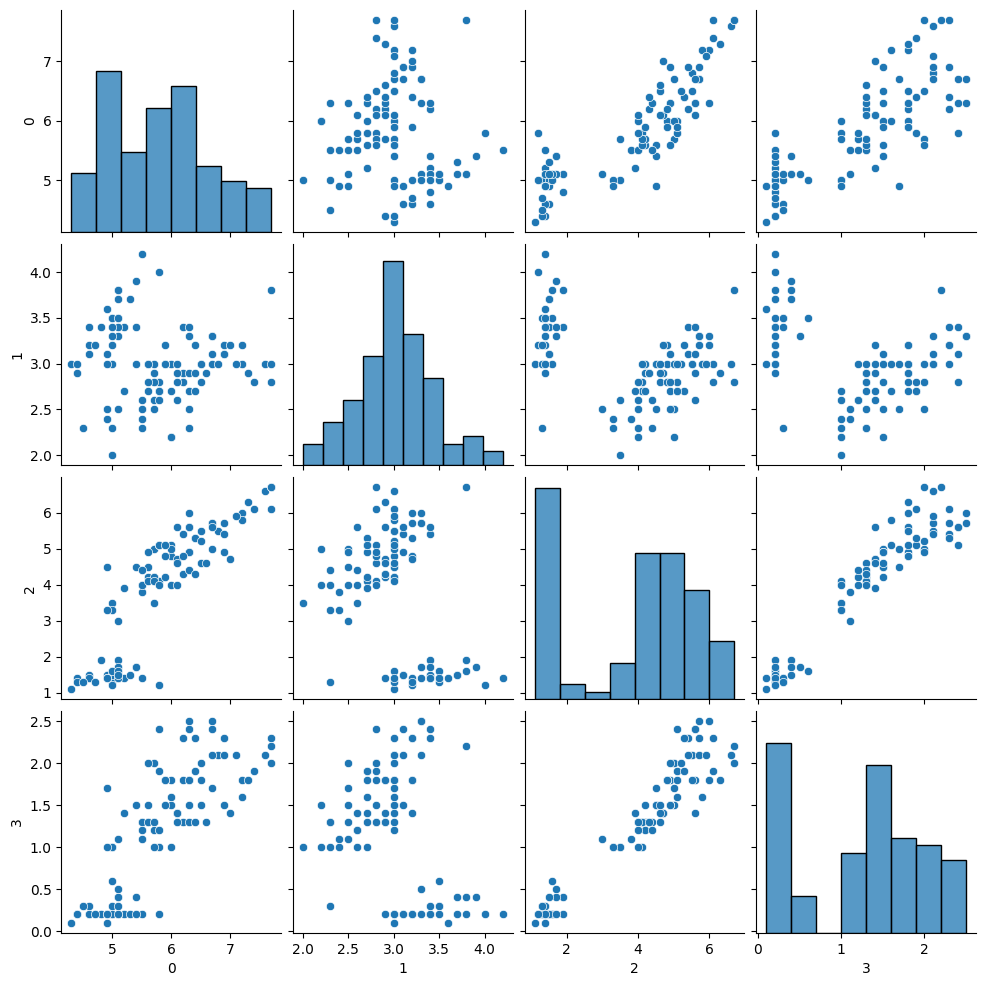

In [95]:
sns.pairplot(pd.DataFrame(X_train))

In [96]:
gnb = GaussianNB()

In [97]:
gnb.fit(X_train, y_train)

GaussianNB()

In [98]:
y_pred = gnb.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [100]:
accuracy_score(y_test, y_pred)*100

96.0

In [101]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [103]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)*100


96.0

In [104]:
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)*100

30.0

In [105]:
### 2nd Example
tips = sns.load_dataset('tips')

In [106]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
df = tips.copy()

In [108]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [110]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


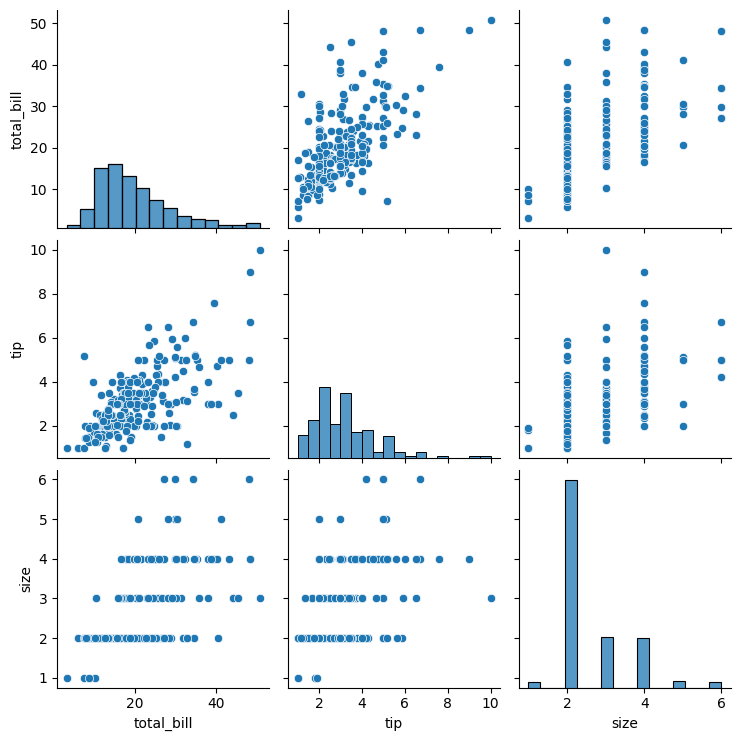

In [111]:
sns.pairplot(df[['total_bill', 'tip', 'size']])

In [112]:
## lets convert in dependent and independent variables
X = df.drop('tip', axis=1)
y = df['tip']

In [113]:
X.shape, y.shape


((244, 6), (244,))

In [114]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [115]:
## total_bil and size are continous variables
## total bil and tip are linearly related so we first try linear regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [117]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [119]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [120]:
lr.score(X_test, y_test)*100  ## not good

22.989274582657014

In [121]:
## lets try other regression models
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)*100

28.08868462989048

In [134]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [143]:
## Now apply Naive Bayes
df = df[['total_bill', 'tip', 'sex', 'smoker', 'time', 'size']]
X = df.drop('smoker', axis=1)
y = df['smoker']


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
X.head()

,total_bill,tip,sex,time,size
0,16.99,1.01,Female,Dinner,2
1,10.34,1.66,Male,Dinner,3
2,21.01,3.50,Male,Dinner,3
3,23.68,3.31,Male,Dinner,2
4,24.59,3.61,Female,Dinner,4


In [151]:
## encode the categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

le1 = LabelEncoder()
le2 = LabelEncoder()



In [ ]:
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['time'] = le2.fit_transform(X_train['time'])
X_test['sex'] = le1.fit_transform(X_test['sex'])
X_test['time'] = le2.fit_transform(X_test['time'])

In [153]:
X_train.sample(10)

,total_bill,tip,sex,time,size
95,40.17,4.73,1,0,4
191,19.81,4.19,0,1,2
99,12.46,1.50,1,0,2
105,15.36,1.64,1,0,2
240,27.18,2.00,0,0,2
72,26.86,3.14,0,0,2
88,24.71,5.85,1,1,2
122,14.26,2.50,1,1,2
224,13.42,1.58,1,1,2
147,11.87,1.63,0,1,2


In [154]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [155]:
mnb.score(X_test, y_test)*100

61.72839506172839

In [156]:
mnb.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No'], dtype='<U3')

In [159]:
mnb.predict([[50, 2, 0, 1, 6]])

/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')